# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The distribution of charges can be justified, less people have more severe (hence, expensive) trips to the hospital. The data is very non-normally distributed. The mean doesn't really reflect what we expect most patients to pay. Many patients pay less than the average but the mean can be shifted due to outliers on the epensive side.

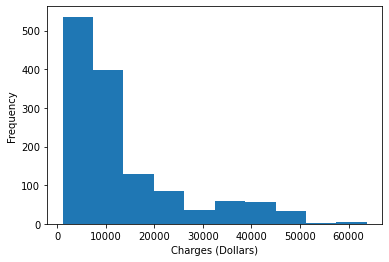

In [4]:
_ = plt.hist(medical['charges'])
_ = plt.xlabel('Charges (Dollars)')
_ = plt.ylabel('Frequency')

In [5]:
print('Mean of charges ($): ' + str(round(np.mean(medical['charges']),2)))
print('Std Dev of charges ($): ' + str(round(np.std(medical['charges'], ddof=1),2)))

Mean of charges ($): 13270.42
Std Dev of charges ($): 12110.01


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ We can create a sampling distribution of the mean charges in the case that these are random samples to use probabilistic and statistical methods that work for normal distributions . Applying the Central Limit Theorem would allow us to give the administrator a very good estimate of what range we would expect the mean to be to a certain degree of confidence. The normal distribution can be used to help measure the accuracy of the sample mean.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Since the administrator is comparing a value to the upper or lower boundary of an interval and claiming that it is above or below it, then we should use a one-sided interval. If we were interested if the mean charges is between the bounds or outside the bounds, we woul use a two-sided interval.

In [6]:
#Picking a random 50 charges and taking the mean 1000 times and storing the values in a list

seed(23)

def charges_sampler(n):
    return np.random.choice(medical['charges'], n)

charges_normal = [np.mean(charges_sampler(50)) for i in range(1000)]

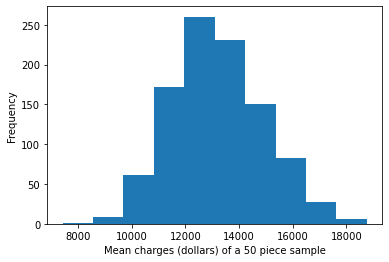

In [7]:
_ = plt.hist(charges_normal)
_ = plt.xlabel('Mean charges (dollars) of a 50 piece sample')
_ = plt.ylabel('Frequency')

In [8]:
#Finding mean of the sampling distribution
sampling_mean = np.mean(charges_normal)
print('sampling distribution mean: ' + str(sampling_mean))

#Finding critical value from the t-distribution table
t_value = t.ppf(0.95, 1337)
print('critical value: ' + str(t_value))

#Using sample_mean +/- t_value * (sample_std/sqrt(sample_size))

lower_end_mean = sampling_mean - (t_value * (np.std(charges_normal) / np.sqrt(50)))
upper_end_mean = sampling_mean + (t_value * (np.std(charges_normal) / np.sqrt(50)))

print('The 95% confidence interval for the mean is ' + str(lower_end_mean) + ' to ' + str(upper_end_mean))


sampling distribution mean: 13219.999598580622
critical value: 1.6459941145571317
The 95% confidence interval for the mean is 12825.98758544413 to 13614.011611717113


__Yes,__ they should be concerned as the confidence interval for the mean is approximately 12,826 to 13,614 and the observation of 12,000 is significantly below this interval.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Null hypothesis: There is no difference between the amount poeple pay with or without insurance (x0-x1=0). Alternative hypothesis: People without insurance pay more than people with insurance (x0-x1<0). Our assumption is the homogeneity of variance. Homogeneous, or equal, variance exists when the standard deviations of samples are approximately equal.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__

In [9]:
#Getting general comparison of insurance vs no insurance charges

insurance = medical[['charges','insuranceclaim']]
insurance.groupby('insuranceclaim').describe()

charges                                                      \
                 count          mean           std        min          25%   
insuranceclaim                                                               
0                555.0   8821.421892   6446.510127  1121.8739  4445.337575   
1                783.0  16423.928277  14045.928419  1131.5066  5733.288925   

                                                        
                        50%           75%          max  
insuranceclaim                                          
0                6933.24225  11424.211575  36910.60803  
1               11538.42100  23484.788875  63770.42801

In [59]:
#Calculating manually

ins = medical.charges[medical.insuranceclaim == 1]
no_ins = medical.charges[medical.insuranceclaim == 0]

s0 = np.std(ins, ddof=1)
s1 = np.std(no_ins, ddof=1)
n0 = len(ins)
n1 = len(no_ins)
x0 = np.mean(ins)
x1 = np.mean(no_ins)
df = n0+n1-2

sp = np.sqrt( (((n0-1)*s0**2) + ((n1-1)*s1**2)) / (n0 + n1 - 2) )
t0 = (x0-x1) / ( sp * ( np.sqrt( (1/n0)+(1/n1) ) ))
print(t0)

11.89329903087671


In [60]:
#Calculating the p-value

2 * t.sf(np.abs(t0), df)

4.461230231620972e-31

In [56]:
#Calculating critical t-value

print(t.ppf(0.05, df))

-1.6459949688112583


Our test statistic, 11.893, is not in our rejection region of t<-1.646, therefore, we fail to reject the null hypothesis. With a significance level of 5%, we fail to reject the null hypothesis and conclude there is not enough evidence to suggest that people with insurance pay less than people without insurance.

In [52]:
#Calculating using scipy.stats

from scipy import stats
stats.ttest_ind(ins, no_ins)


Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ No, z-tests aren't used for samples and are really only used when you know the population standar deviation and mean, and it seems almost always we will be working with samples and not the entire population.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test